# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
bodyfat = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/master/datasets/560_bodyfat/560_bodyfat.tsv.gz", sep="\t")
bodyfat.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,1.0708,23.0,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999,21.900000,32.000000,27.400000,17.100000,12.300000
1,1.0853,22.0,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999,23.400000,30.500000,28.900000,18.200001,6.100000
2,1.0414,22.0,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002,24.000000,28.799999,25.200001,16.600000,25.299999
3,1.0751,26.0,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999,22.799999,32.400002,29.400000,18.200001,10.400000
4,1.0340,24.0,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001,24.000000,32.200001,27.700001,17.700001,28.700001


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# I droped these four columns because they are the leaset relevant to body fat, leaving the target column and 10 other columns as features.
bodyfat_cleaned = bodyfat.drop(columns=["Ankle", "Knee", "Wrist", "Neck"])
list(bodyfat_cleaned.columns)

['Density',
 'Age',
 'Weight',
 'Height',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Biceps',
 'Forearm',
 'target']

1. Density: An estimated amount of mass relative to body volume.
2. Age: The age of the individual in years.
3. Weight: Body weight measured in pounds.
4. Height: Height of the individual in inches.
5. Chest: Chest circumference in centimeters.
6. Abdomen: Abdominal circumference in centimeters.
7. Hip: Hip circumference in centimeters.
8. Thigh: Thigh circumference in centimeters.
9. Biceps: Flexed biceps circumference in centimeters.
10. Forearm: Forearm circumference in centimeters.
11. target: The actual body fat percentage for each individual.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [5]:
# YOUR CODE HERE
bodyfat_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Chest    252 non-null    float64
 5   Abdomen  252 non-null    float64
 6   Hip      252 non-null    float64
 7   Thigh    252 non-null    float64
 8   Biceps   252 non-null    float64
 9   Forearm  252 non-null    float64
 10  target   252 non-null    float64
dtypes: float64(11)
memory usage: 21.8 KB


In [6]:
bodyfat_cleaned.describe()

,Density,Age,Weight,Height,Chest,Abdomen,Hip,Thigh,Biceps,Forearm,target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,100.824206,92.555952,99.904762,59.405952,32.273413,28.663889,19.150794
std,0.019031,12.602040,29.389160,3.662856,8.430476,10.783077,7.164058,5.249952,3.021274,2.020691,8.368740
min,0.995000,22.000000,118.500000,29.500000,79.300003,69.400002,85.000000,47.200001,24.799999,21.000000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,94.350000,84.574999,95.500000,56.000000,30.200001,27.299999,12.475000
50%,1.054900,43.000000,176.500000,70.000000,99.649998,90.950001,99.300003,59.000000,32.049999,28.700001,19.200001
75%,1.070400,54.000000,197.000000,72.250000,105.375002,99.324997,103.525000,62.349999,34.325000,30.000000,25.299999
max,1.108900,81.000000,363.149994,77.750000,136.199997,148.100006,147.699997,87.300003,45.000000,34.900002,47.500000


In [7]:
bodyfat_cleaned.isnull().sum()

Density    0
Age        0
Weight     0
Height     0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Biceps     0
Forearm    0
target     0
dtype: int64

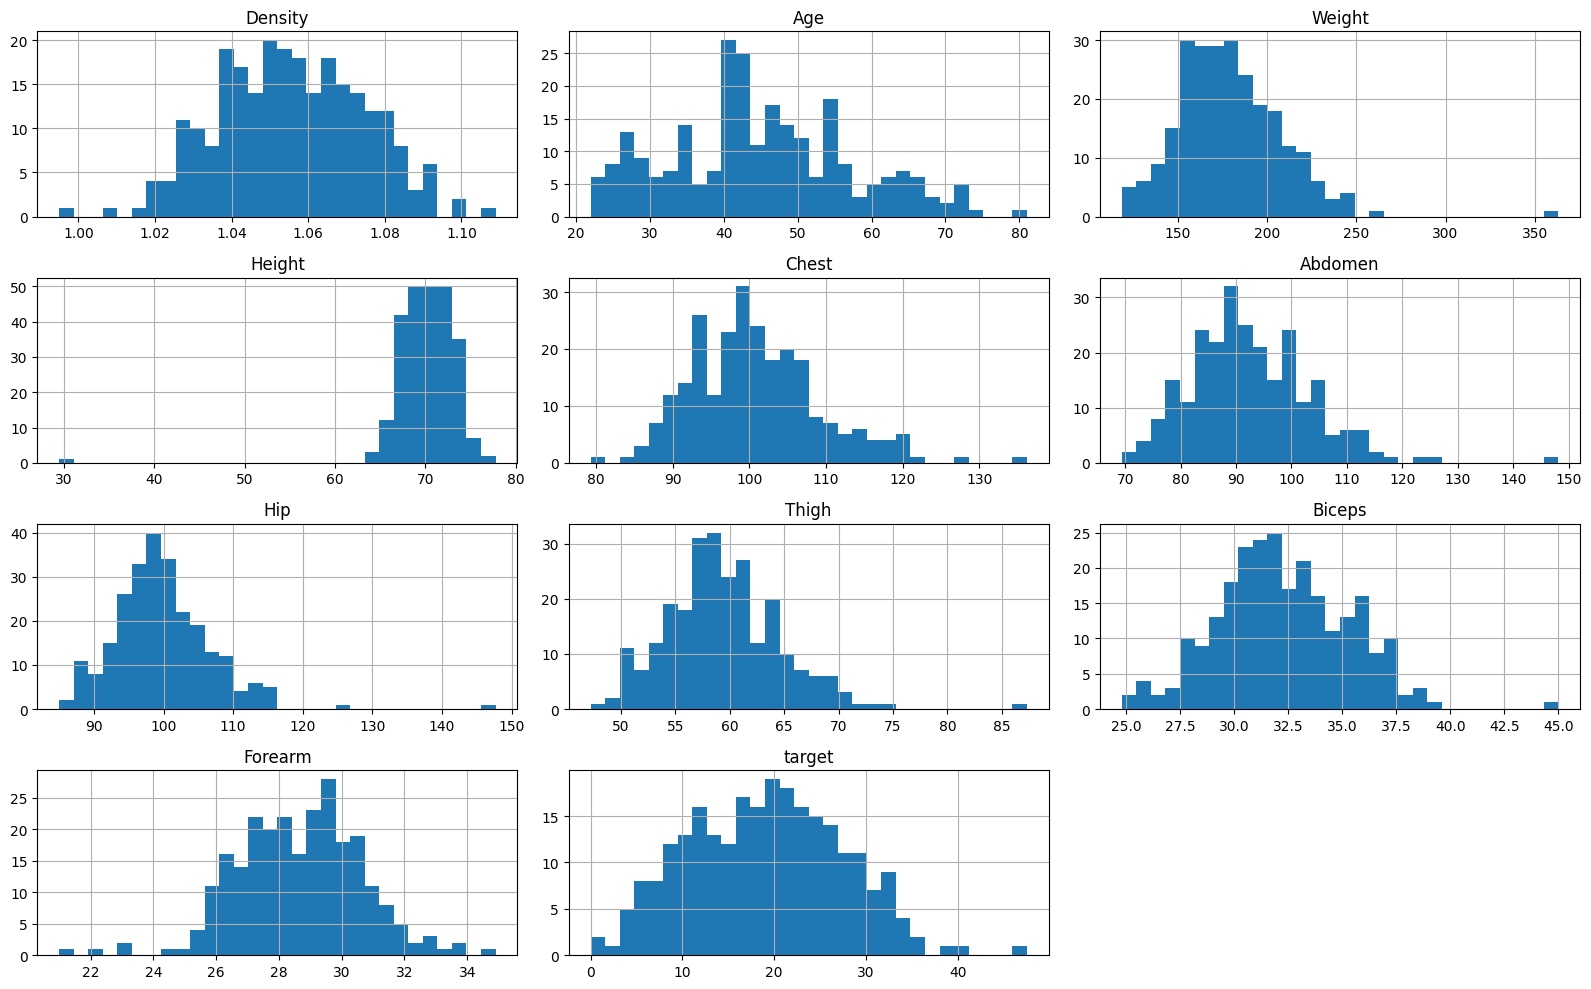

In [8]:
bodyfat_cleaned.hist(figsize=(16, 10), bins=30)
plt.tight_layout()
plt.show()

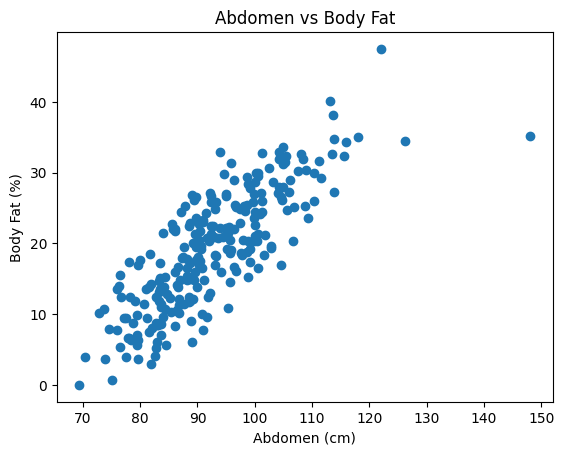

In [9]:
#Chart 1: Abdomen vs Body Fat
plt.scatter(bodyfat_cleaned['Abdomen'], bodyfat_cleaned['target'])
plt.xlabel("Abdomen (cm)")
plt.ylabel("Body Fat (%)")
plt.title("Abdomen vs Body Fat")
plt.show()

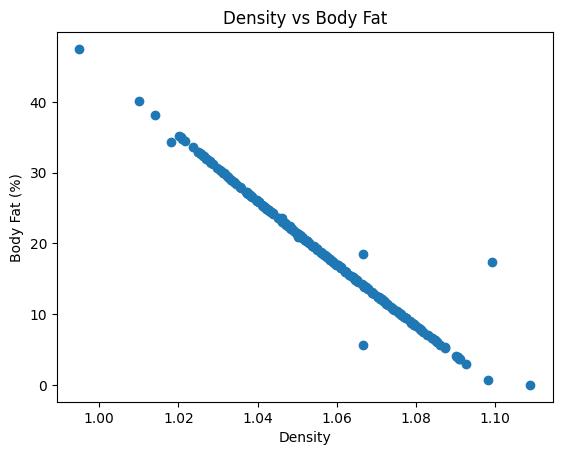

In [10]:
#Chart 2: Density vs Body Fat
plt.scatter(bodyfat_cleaned['Density'], bodyfat_cleaned['target'])
plt.xlabel("Density")
plt.ylabel("Body Fat (%)")
plt.title("Density vs Body Fat")
plt.show()

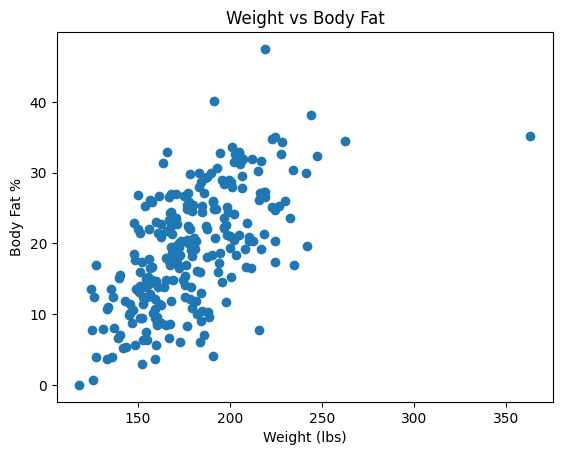

In [11]:
#Chart 3: Weight vs Body Fat
plt.scatter(bodyfat_cleaned['Weight'], bodyfat_cleaned['target'])
plt.xlabel("Weight (lbs)")
plt.ylabel("Body Fat %")
plt.title("Weight vs Body Fat")
plt.show()

I started the exploratory analysis by getting a general sense of the dataset: the size, the variables, and how the measurements are distributed. These checks confirm that all variables are numeric and that there are no missing values after cleaning. The dataset contains 252 observations and 11 columns. The target variable ranges from very low to over 40 percent, giving the dataset enough variability to identify meaningful relationships with the predictors.

Chart 1: Abdomen vs Body Fat

This chart shows a very clear upward trend. As abdomen circumference increases, body-fat percentage rises as well. This indicates that abdominal measurements are one of the strongest indicators of overall body fat, which is consistent with what many health studies show.

Chart 2: Density vs Body Fat

The relationship between density and body fat is strongly negative. Individuals with higher body density generally have lower body-fat percentages. This lines up with basic biology, because fat tissue is less dense than lean tissue. In the scatter plot, this pattern appears clearly as a steady downward trend.

Chart 3:Weight vs Body Fat

This plot shows that weight alone is not a reliable indicator of body fat. Two people with the same weight can have very different body-fat percentages. This reinforces why body-fat estimates rely on density and circumference measurements rather than weight by itself.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

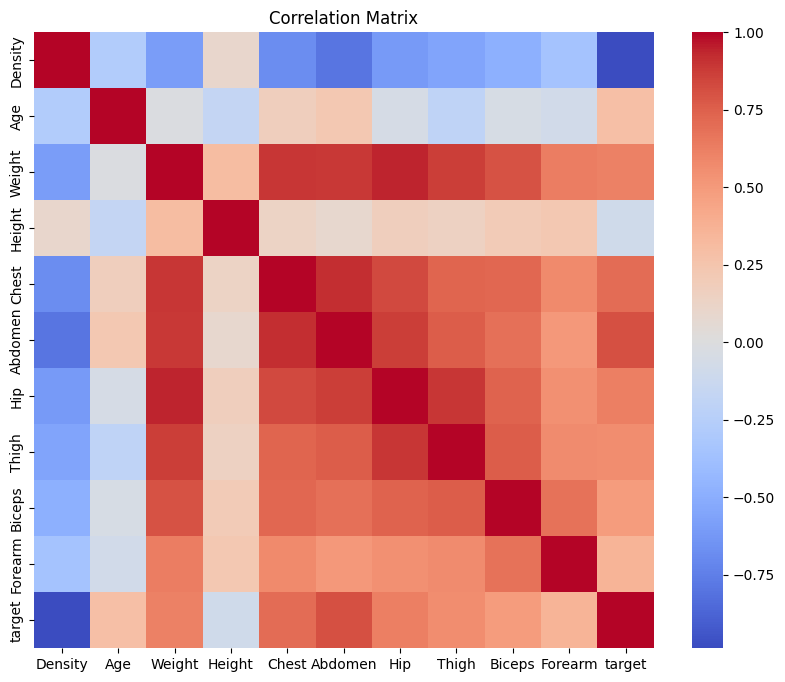

In [12]:
# YOUR CODE HERE
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(bodyfat_cleaned.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The strongest correlation between two different columns is Weight and Hip. The color intensity between Weight and Hip is the deepest red. People who weigh more tend to have larger hip measurements, reflecting the overall body size.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

1. Linear Regression

link to scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

link to web page: https://en.wikipedia.org/wiki/Linear_regression

2. Random Forest Regressor

link to scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

link to web page: https://en.wikipedia.org/wiki/Random_forest

3. Support Vector Regression

link to scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

link to web page: https://en.wikipedia.org/wiki/Support-vector_machine#Regression

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [13]:
bodyfat_features = bodyfat_cleaned.drop(columns=["target"])
bodyfat_target = bodyfat_cleaned["target"]

In [14]:
#Model 1: Linear Regression
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(bodyfat_features, bodyfat_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
linear_pred = linear_model.predict(bodyfat_features)

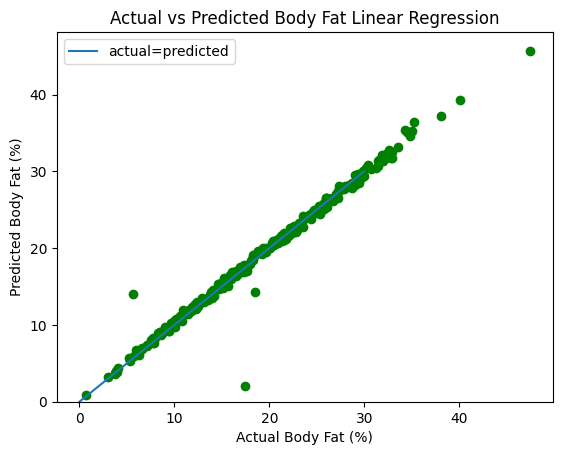

In [16]:
plt.plot([0, 30], [0, 30], label="actual=predicted")
plt.scatter( bodyfat_target, linear_pred, color="green")

plt.gca().set_ylim(0)
plt.legend()
plt.title("Actual vs Predicted Body Fat Linear Regression")
plt.xlabel("Actual Body Fat (%)")
plt.ylabel("Predicted Body Fat (%)")

None

In [17]:
lr_L1 = sklearn.metrics.mean_absolute_error(bodyfat_target, linear_pred)
lr_L1

0.4723663558978641

In [18]:
lr_L2 = sklearn.metrics.mean_squared_error(bodyfat_target, linear_pred)
lr_L2

1.540055476585182

In [19]:
#Model 2: Random Forest Regressor
rf_model = sklearn.ensemble.RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(bodyfat_features, bodyfat_target)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
rf_pred = rf_model.predict(bodyfat_features)

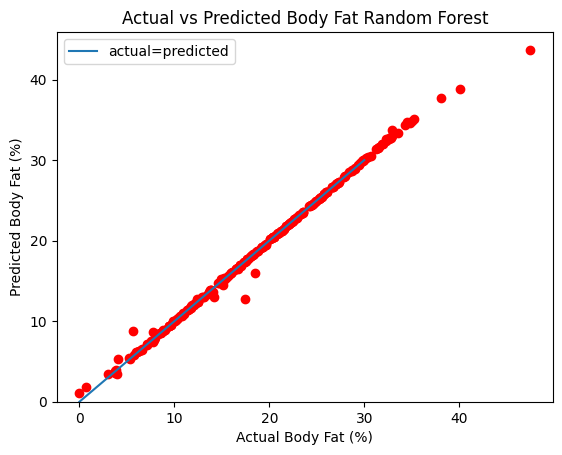

In [21]:
plt.plot([0, 30], [0, 30], label="actual=predicted")
plt.scatter( bodyfat_target, rf_pred, color="red")

plt.gca().set_ylim(0)
plt.legend()
plt.title("Actual vs Predicted Body Fat Random Forest")
plt.xlabel("Actual Body Fat (%)")
plt.ylabel("Predicted Body Fat (%)")

None

In [22]:
rf_L1 = sklearn.metrics.mean_absolute_error(bodyfat_target, rf_pred)
rf_L1

0.14983334637941817

In [23]:
rf_L2 = sklearn.metrics.mean_squared_error(bodyfat_target, rf_pred)
rf_L2

0.2519327010729352

In [24]:
#Model 3: Support Vector Regression
svr_model = sklearn.svm.SVR(kernel='rbf', C=10, epsilon=0.2)
svr_model.fit(bodyfat_features, bodyfat_target)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,10
,epsilon,0.2
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [25]:
svr_pred = svr_model.predict(bodyfat_features)

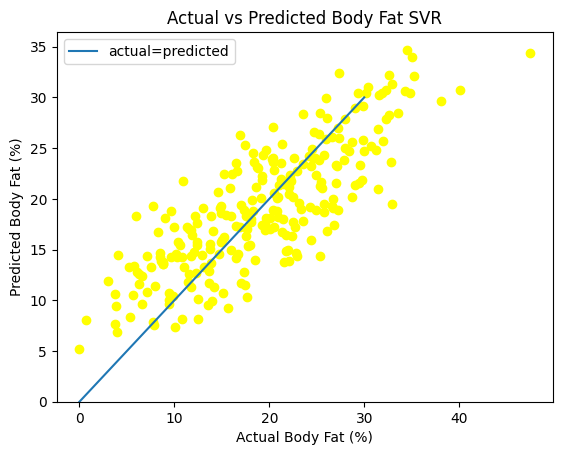

In [26]:
plt.plot([0, 30], [0, 30], label="actual=predicted")
plt.scatter( bodyfat_target, svr_pred, color="yellow")

plt.gca().set_ylim(0)
plt.legend()
plt.title("Actual vs Predicted Body Fat SVR")
plt.xlabel("Actual Body Fat (%)")
plt.ylabel("Predicted Body Fat (%)")

None

In [27]:
svr_L1 = sklearn.metrics.mean_absolute_error(bodyfat_target, svr_pred)
svr_L1

3.9785381308281673

In [28]:
svr_L2 = sklearn.metrics.mean_squared_error(bodyfat_target, svr_pred)
svr_L2

24.227396410148188

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [29]:
from sklearn.model_selection import cross_validate
cv_lr = cross_validate(linear_model, bodyfat_features, bodyfat_target, cv=5, scoring="neg_mean_squared_error")
cv_rf = cross_validate(rf_model, bodyfat_features, bodyfat_target, cv=5, scoring="neg_mean_squared_error")
cv_svr = cross_validate(svr_model, bodyfat_features, bodyfat_target, cv=5, scoring="neg_mean_squared_error")

In [30]:
cv_lr_L2 = -cv_lr["test_score"].mean()
cv_lr_L2


np.float64(1.916520336368785)

In [31]:
cv_rf_L2 = -cv_rf["test_score"].mean()
cv_rf_L2

np.float64(2.6438085960221556)

In [32]:
cv_svr_L2 = -cv_svr["test_score"].mean()
cv_svr_L2

np.float64(27.625864252949594)

In [33]:
results_table = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVR"],
    "L1 MAE": [lr_L1, rf_L1, svr_L1],
    "L2 MSE": [lr_L2, rf_L2, svr_L2],
    "5-Fold CV L2 MSE": [cv_lr_L2, cv_rf_L2, cv_svr_L2]
})

results_table

,Model,L1 MAE,L2 MSE,5-Fold CV L2 MSE
0,Linear Regression,0.472366,1.540055,1.916520
1,Random Forest,0.149833,0.251933,2.643809
2,SVR,3.978538,24.227396,27.625864


The L2 losses from 5-fold cross-validation are higher because the model is being evaluated on new data in each fold. When we test it on the data it was trained on, the errors are smaller because the model already knows those points. Cross-validation avoids this and shows more realistic errors.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [35]:
pipeline_lr = make_pipeline(StandardScaler(), LinearRegression())
pipeline_rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=200, random_state=42))
pipeline_svr = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=10, epsilon=0.2))

In [36]:
#Model 1: Linear Regression
pipeline_lr.fit(bodyfat_features, bodyfat_target)
pipeline_lr_pred = pipeline_lr.predict(bodyfat_features)
pineline_lr_L2 = sklearn.metrics.mean_squared_error(bodyfat_target, pipeline_lr_pred)
pineline_lr_L2

1.5400554765851733

In [37]:
#Model 2: Random Forest Regressor
pipeline_rf.fit(bodyfat_features, bodyfat_target)
pipeline_rf_pred = pipeline_rf.predict(bodyfat_features)
pineline_rf_L2 = sklearn.metrics.mean_squared_error(bodyfat_target, pipeline_rf_pred)
pineline_rf_L2

0.25189401962094665

In [38]:
#Model 3: Support Vector Regression
pipeline_svr.fit(bodyfat_features, bodyfat_target)
pipeline_svr_pred = pipeline_svr.predict(bodyfat_features)
pineline_svr_L2 = sklearn.metrics.mean_squared_error(bodyfat_target, pipeline_svr_pred)
pineline_svr_L2

0.8362518118111858

In [39]:
results_table = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVR"],
    "L1 MAE": [lr_L1, rf_L1, svr_L1],
    "L2 MSE": [lr_L2, rf_L2, svr_L2],
    "5-Fold CV L2 MSE": [cv_lr_L2, cv_rf_L2, cv_svr_L2],
    "Pipeline L2 MSE": [pineline_lr_L2, pineline_rf_L2, pineline_svr_L2]
})

results_table

,Model,L1 MAE,L2 MSE,5-Fold CV L2 MSE,Pipeline L2 MSE
0,Linear Regression,0.472366,1.540055,1.916520,1.540055
1,Random Forest,0.149833,0.251933,2.643809,0.251894
2,SVR,3.978538,24.227396,27.625864,0.836252


Linear Regression model and Random Forest model behave the same whether features are scaled or not. SVR model changed significantly after using a pipeline with StandardScaler. SVR model didn't perform well before scaling because the features with larger numerical ranges had too much influence on the RBF kernel, while smaller-scale features contributed little. Once the data was standardized and all variables were on a similar scale, the model behaved more consistently and its L2 loss decreased significantly..

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

Trying many trees with random depths does not guarantee better performance without proper splitting and regularizing, because a single deep tree is unstable and prone to overfitting.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [40]:
results_table

,Model,L1 MAE,L2 MSE,5-Fold CV L2 MSE,Pipeline L2 MSE
0,Linear Regression,0.472366,1.540055,1.916520,1.540055
1,Random Forest,0.149833,0.251933,2.643809,0.251894
2,SVR,3.978538,24.227396,27.625864,0.836252


The best model in this project is Linear Regression model becasue it's the most stable model among the three. 

The criterias I used are:
1. the L2 loss when training on the full dataset
2. the 5-fold cross-validation L2 loss
3. the pipepline L2 loss
4. the gap between the three L2 loss
5. how well the model structure fits the relationships between columns in the body-fat data

The L2 loss on the full dataset and the 5-fold cross-validation results were both relatively low for the Linear Regression and Random Forest models, but much higher for the SVR model. SVR only performed well after using the pipeline with standard scaler, and its L2 losses were much higher without scaling. For Linear Regression, the training L2, cross-validation L2, and pipeline L2 were all close to each other, which suggests that the model is not overfitting and should perform similarly on new data. Random Forest had the lowest training and pipeline L2 losses, but its cross-validation L2 was noticeably higher than Linear Regression’s, and the gap between its training and pipeline losses was larger. This pattern indicates overfitting, meaning the model fits the training data extremely well but does not generalize as well to unseen observations.

From a modeling perspective, Linear Regression also fits the structure of the body fat data. Most predictors such as abdomen, chest, hip measurements, and density show almost linear relationships with body-fat percentage, making a linear model perfectly suited to this dataset.